<img src="women_men_soccer.jpg" alt="Women vs Men" width = 500 />

# Hypothesis Testing with Men's and Women's Soccer Matches

This is a guided project that I finished on `DataCamp` platform. The text iz below.

"You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

**$H_0$** : The mean number of goals scored in women's international soccer matches is the same as men's.

**$H_A$** : The mean number of goals scored in women's international soccer matches is greater than men's."

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option('mode.chained_assignment', None)
sns.set()

## 1. EDA (Exploratory data analysis)
### Determing the column names, data types, and values

In [2]:
men = pd.read_csv('men_results.csv')
women = pd.read_csv('women_results.csv')

In [3]:
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [4]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [5]:
men.columns

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')

In [6]:
men.drop('Unnamed: 0',axis = 1, inplace = True)
women.drop('Unnamed: 0',axis = 1, inplace = True)

In [7]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [8]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4884 non-null   object
 1   home_team   4884 non-null   object
 2   away_team   4884 non-null   object
 3   home_score  4884 non-null   int64 
 4   away_score  4884 non-null   int64 
 5   tournament  4884 non-null   object
dtypes: int64(2), object(4)
memory usage: 229.1+ KB


We can see that for women we have data only from 1969, while for men it is from 1872.

## 2. Filtering the data

#### Filter the data to only include official `FIFA World Cup` mathes that took place after `2002-01-01`.

In [9]:
# Change the data from object to datetime type
men['date'] = pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])

In [10]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.0+ MB


In [11]:
men.tournament.value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [12]:
# Create subsets for both men and women that include offical 'FIFA World Cup' matches from 2002-01-01
men_subset = men[men['tournament'].isin(['FIFA World Cup']) & (men['date'] > '2002-01-01')]
women_subset = women[women['tournament'].isin(['FIFA World Cup']) & (women['date'] > '2002-01-01')]

In [13]:
men_subset.head()

,date,home_team,away_team,home_score,away_score,tournament
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [14]:
print(f"The number of women's soccer matches: {women_subset.shape[0]}")
print(f"The number of men's soccer matches: {men_subset.shape[0]}")

The number of women's soccer matches: 200
The number of men's soccer matches: 384


In our datsets we have two different columns that include the number of golas: `home_score` and `away_score`. We should merge them into new column called `goal_scored` for easy calculations.

In [15]:
men_subset[['home_score', 'away_score']]

,home_score,away_score
25164,0,1
25165,8,0
25166,1,1
25167,1,2
25168,1,0
...,...,...
44343,1,2
44345,3,0
44346,2,0
44350,2,1


In [16]:
# Create column goal_scored
men_subset['goal_scored'] = men_subset['home_score'] + men_subset['away_score']
women_subset['goal_scored'] = women_subset['home_score'] + women_subset['away_score']

# Delete the column home_score and away_score
men_subset.drop(['home_score', 'away_score'],axis = 1, inplace = True)
women_subset.drop(['home_score', 'away_score'],axis = 1, inplace = True)

In [17]:
men_subset.head()

,date,home_team,away_team,tournament,goal_scored
25164,2002-05-31,France,Senegal,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,FIFA World Cup,1


## 3. Choosing the correct hypothesis test

**$H_0$** : The mean number of goals scored in women's international soccer matches is the same as men's.

**$H_A$** : The mean number of goals scored in women's international soccer matches is greater than men's.

Before performing the hypothesis test, let’s visualize our data to get a preliminary
understanding.

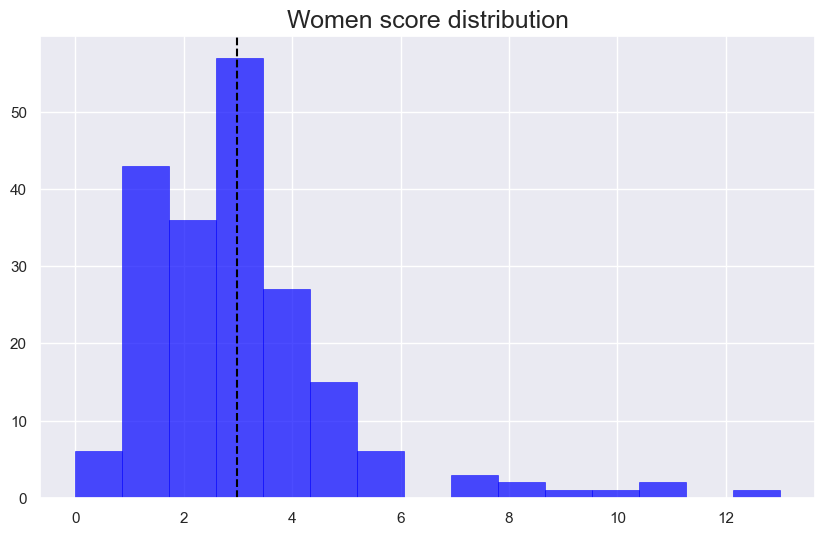

In [18]:
# Data separation
women_score = women_subset['goal_scored']
men_score = men_subset['goal_scored']

# Setting up the visualization 
plt.figure(figsize = (10,6))

# Create histograms for Women score distribution based on 'goal_scored'
plt.hist(women_score, bins = 15, alpha = 0.7, color = 'blue', edgecolor = 'blue', lw = 0.5,
        label = 'Women score distribution')

mean_women = np.mean(women_score)
plt.axvline(mean_women, color ='black', linestyle ='dashed', linewidth=1.5,
          label = f"Women mean score: {mean_women:.2f}")

plt.title('Women score distribution',fontsize = 18)
plt.show()


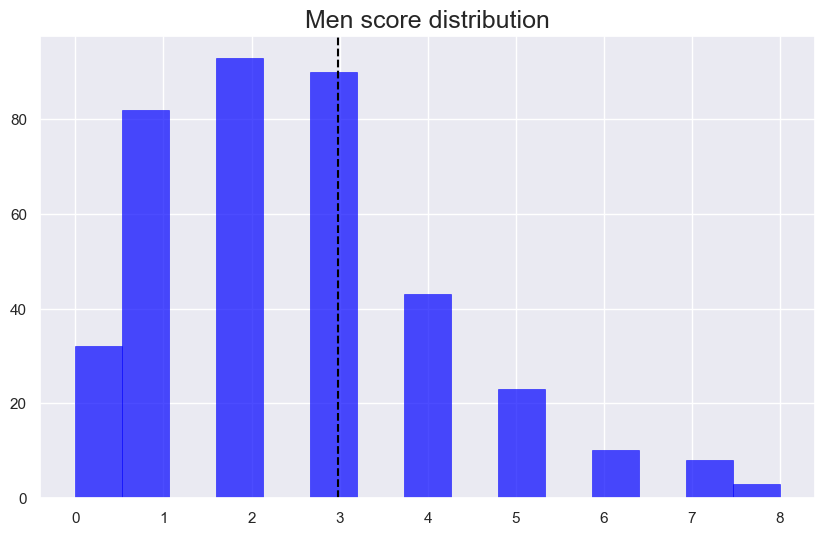

In [19]:
# Setting up the visualization 
plt.figure(figsize = (10,6))

# Create histograms for Women score distribution based on 'goal_scored'
plt.hist(men_score, bins = 15, alpha = 0.7, color = 'blue', edgecolor = 'blue', lw = 0.5,
        label = 'Men score distribution')

mean_men = np.mean(men_score)
plt.axvline(mean_women, color ='black', linestyle ='dashed', linewidth=1.5,
          label = f"Men mean score: {mean_men:.2f}")

plt.title('Men score distribution',fontsize = 18)
plt.show()

In [20]:
print(f"The mean of women score is {mean_women:.2f}.")
print(f"The mean of men score is {mean_men:.2f}.")

The mean of women score is 2.98.
The mean of men score is 2.51.


In [21]:
len(men_score), len(women_score)

(384, 200)

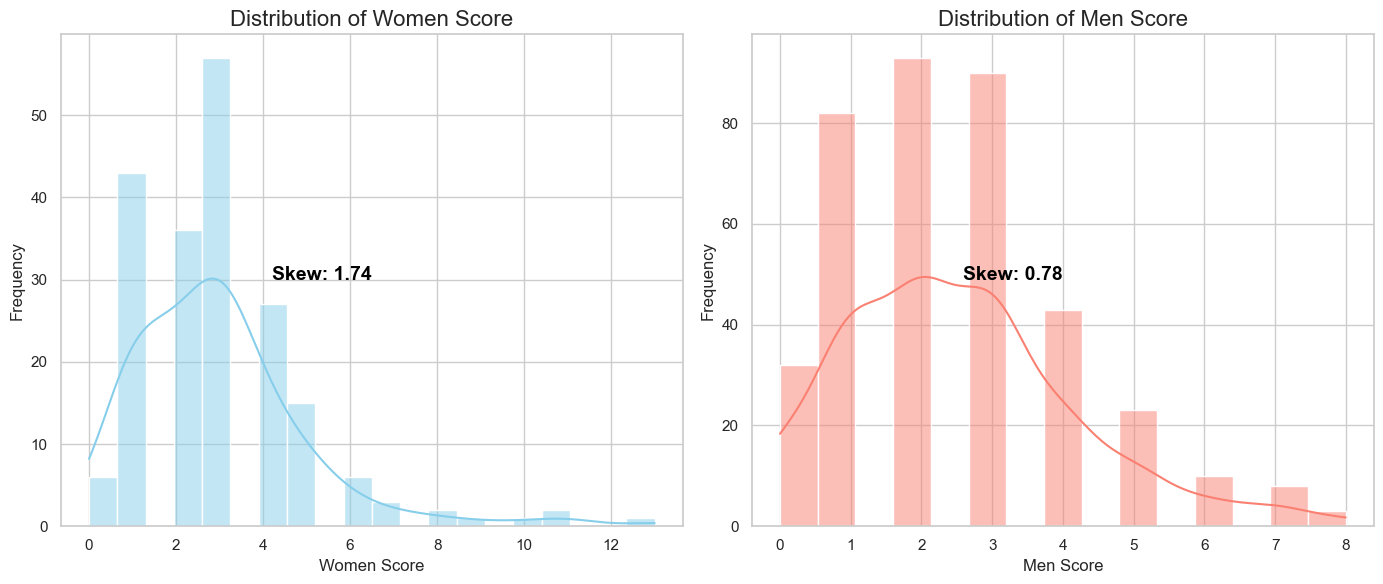

In [32]:
women_score_skew = women_score.skew()
men_score_skew = men_score.skew()

sns.set(style = 'whitegrid')

# Create a figure for 2 subplots
fig, ax = plt.subplots(1,2, figsize = (14,6))

# Plot Women score
sns.histplot(women_score, kde = True, ax= ax[0], color = 'skyblue')
ax[0].set_title('Distribution of Women Score', fontsize = 16)
ax[0].set_xlabel('Women Score')
ax[0].set_ylabel('Frequency')

# Annotate Skewness
ax[0].text(0.5, 0.5, f'Skew: {women_score_skew:.2f}', transform=ax[0].transAxes,
          horizontalalignment = 'right', color ='black', weight = 'bold', fontsize = 14)


# Plot Men score
sns.histplot(men_score, kde = True, ax= ax[1], color = 'salmon')
ax[1].set_title('Distribution of Men Score', fontsize = 16)
ax[1].set_xlabel('Men Score')
ax[1].set_ylabel('Frequency')

# Annotate Skewness
ax[1].text(0.5, 0.5, f'Skew: {men_score_skew:.2f}', transform=ax[1].transAxes,
          horizontalalignment = 'right', color ='black', weight = 'bold', fontsize = 14)


plt.tight_layout()
plt.show()

The distibutions are not normaly, so we cannot use t-test.
We can check this assumption about distribution using Shapiro-Wilk test.

**$H_{0}$**: The data follows the specified distribution (normal distribution, in this case)

**$H_{1}$**: The data does not follow the specified distribution.

In [22]:
from scipy.stats import shapiro
print(f"Woman score distribution:\n {shapiro(women_score)}")
print(f"Man score distribution: \n {shapiro(men_score)}")

Woman score distribution:
 ShapiroResult(statistic=0.8491010665893555, pvalue=3.890452684399831e-13)
Man score distribution: 
 ShapiroResult(statistic=0.9266489148139954, pvalue=8.894154401688226e-13)


In [23]:
alpha = 0.05
p_val = shapiro(women_score)[1]
if p_val <= alpha:
    print('Reject the null hypothesis that the data is normaly distributed.')
else:
    pritn('Fail to reject')

Reject the null hypothesis that the data is normaly distributed.


Because of the result (p_value is less than 0.05) we can reject the null hypothesis.
Now it is obvious that these distributions are not normal.
So, instead t-test we can useo non-parametric test called `Wilcoxon-Mann_Whitney`.


## 4. Performing the hypothesis test

In [24]:
from scipy.stats import mannwhitneyu

result = mannwhitneyu(x = women_score, y = men_score, alternative = 'greater')
print(result)

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)


## 5. Interpreting the reults of the hypothesis test


In [25]:
alpha = 0.001
p_val = result[1]

if p_val <= alpha:
    result = 'reject'
else:
    result = 'fail to reject'
    

In [27]:
result_dict = {'p_val' : p_val, 'result': result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'fail to reject'}


## Conclusion

The result of testing hypothesis is above, and based on theory we can conclude that we should reject the hypothesis "The mean number of goals scored in women's international soccer matches is the same as men's".